In [372]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [373]:
df = pd.read_excel('Online Retail.xlsx')

In [374]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Информация о датасете:

Это набор транзакционных данных, который содержит все транзакции, произошедшие в период с 01.12.2010 по 09.12.2011 для британской компании, зарегистрированной как интернет-магазин без физического магазина. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.

- InvoiceNo: номер счета-фактуры. Номинальное значение, 6-значное целое число, уникально присваиваемое каждой транзакции. Если этот код начинается с буквы «c», это означает отмену. 
- StockCode: код продукта (товара). Номинальное значение, 5-значное целое число, уникально присваиваемое каждому отдельному продукту.
- Description: Название продукта (товара). Номинальное.
- Quantity: Количество каждого продукта (товара) в каждой транзакции. Числовое.
- InvoiceDate: Дата и время выставления счета. Числовое, день и время, когда была сгенерирована каждая транзакция.
- UnitPrice: Цена за единицу. Числовое значение, цена продукта за единицу в фунтах стерлингов.
- CustomerID: Номер клиента. Номинальное значение, 5-значное целое число, уникально присваиваемое каждому клиенту.
- Country: Название страны. Номинальное значение, название страны, в которой проживает каждый клиент.

In [376]:
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [377]:
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)

In [378]:
df.isnull().mean() * 100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [379]:
#кол-во уникальных значений в столбцах
for i in df.columns:
    print(f'{i}: {len(df[i].unique())}')

InvoiceNo: 22190
StockCode: 3684
Description: 3896
Quantity: 436
InvoiceDate: 20460
UnitPrice: 620
CustomerID: 4372
Country: 37


In [380]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


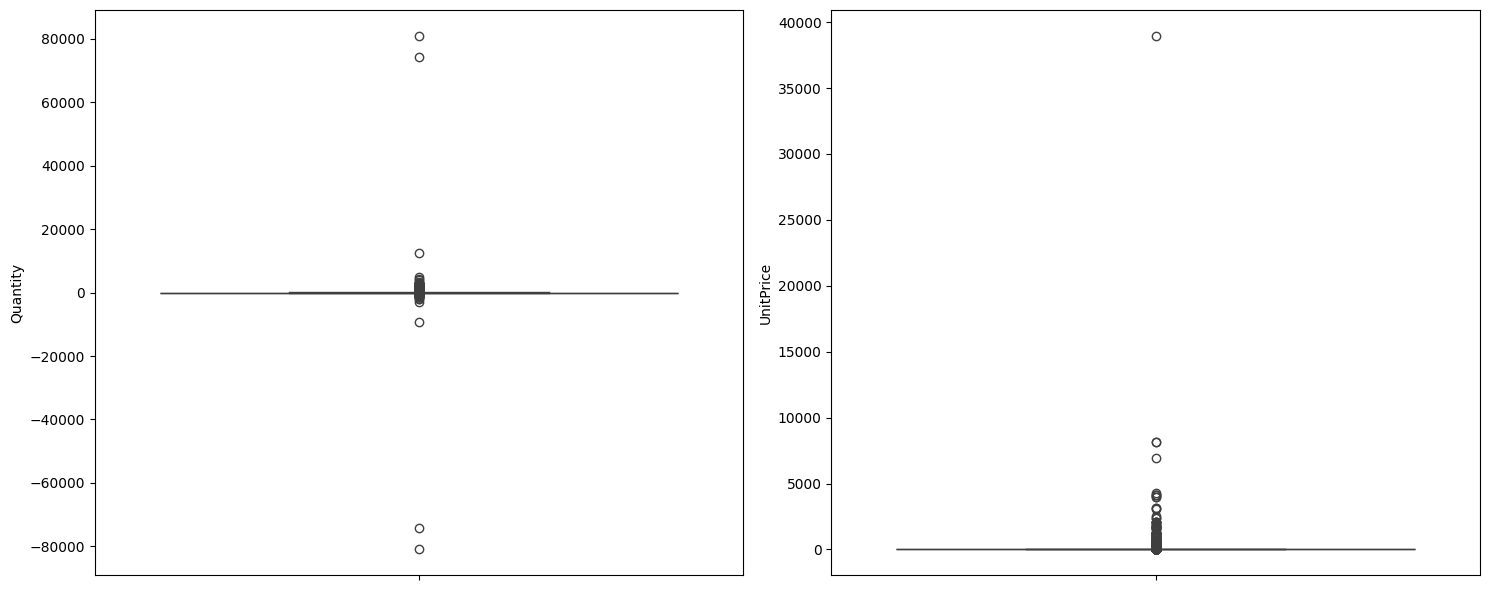

In [381]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(df['Quantity'], ax = axes[0])
sns.boxplot(df['UnitPrice'], ax = axes[1])
plt.tight_layout()

In [405]:
#Сколько в среднем клиенты покупают вещей
print(int(np.floor(df.groupby(['CustomerID'])['Quantity'].mean()[lambda x: x != 0].mean())))
#Сколько чаще всего клиенты покупают вещей
print(int(np.floor(df.groupby(['CustomerID'])['Quantity'].median()[lambda x: x != 0].mean())))

7
7


In [404]:
print(float(np.round(df.groupby(['Description'])['UnitPrice'].mean()[lambda x: x != 0].mean(),2)))
print(float(np.round(df.groupby(['Description'])['UnitPrice'].median()[lambda x: x != 0].mean(),2)))

2.03
2.02


In [ ]:
df = df[(df['Quantity'] <= 20) & (df['Quantity'] >= 0)]
df = df[df['UnitPrice'] <= 5]

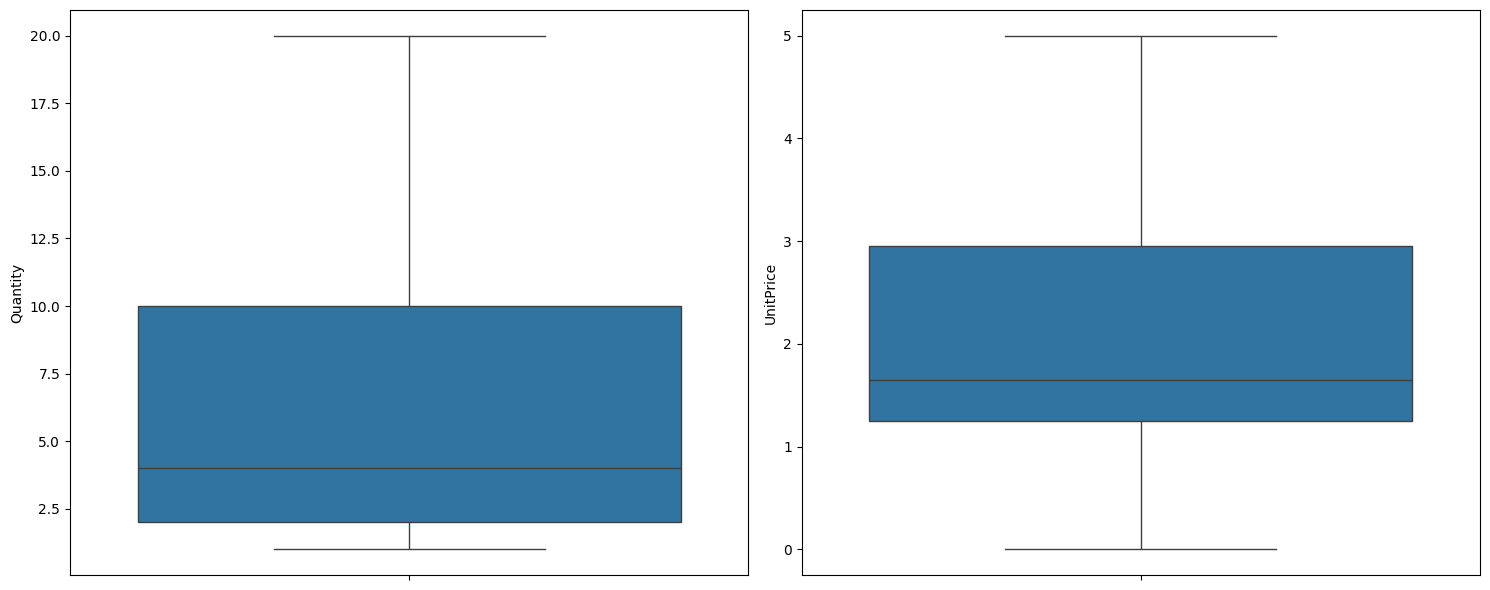

In [401]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(df['Quantity'], ax = axes[0])
sns.boxplot(df['UnitPrice'], ax = axes[1])
plt.tight_layout()

In [406]:
#Самые популярные товары 
df_top_10_most_popular_products = df.groupby(['StockCode','Description'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending=False)[:10]
df_top_10_most_popular_products

,StockCode,Description,Quantity
3077,85099B,JUMBO BAG RED RETROSPOT,12100
2412,84879,ASSORTED COLOUR BIRD ORNAMENT,10263
3084,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9948
94,20725,LUNCH BAG RED RETROSPOT,9676
96,20727,LUNCH BAG BLACK SKULL.,7349
97,20728,LUNCH BAG CARS BLUE,7001
1088,22382,LUNCH BAG SPACEBOY DESIGN,6834
1795,23206,LUNCH BAG APPLE DESIGN,6815
1091,22384,LUNCH BAG PINK POLKADOT,6700
2237,47566,PARTY BUNTING,6668


In [388]:
df.groupby(['StockCode','Description'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending=False)[:10]

,StockCode,Description,Quantity
3477,85099B,JUMBO BAG RED RETROSPOT,12100
2744,84879,ASSORTED COLOUR BIRD ORNAMENT,10263
3484,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9962
95,20725,LUNCH BAG RED RETROSPOT,9676
97,20727,LUNCH BAG BLACK SKULL.,7349
1219,22423,REGENCY CAKESTAND 3 TIER,7321
98,20728,LUNCH BAG CARS BLUE,7001
1181,22382,LUNCH BAG SPACEBOY DESIGN,6834
2035,23206,LUNCH BAG APPLE DESIGN,6815
1184,22384,LUNCH BAG PINK POLKADOT,6700


C:\Users\Irbis\AppData\Local\Temp\ipykernel_19432\2887911178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StockCode', y='Quantity', data = df_top_10_most_popular_products, palette='Set2')


Text(0, 0.5, 'Количество покупок')

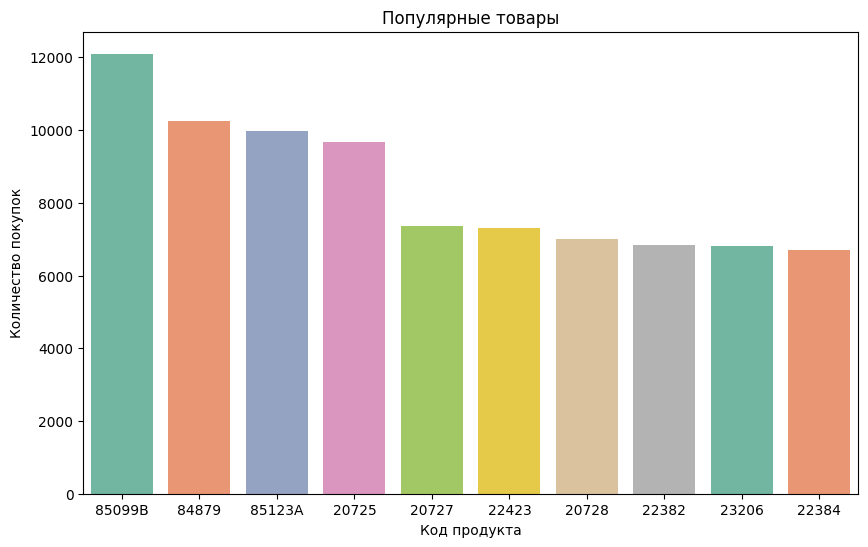

In [389]:
plt.figure(figsize=(10,6))
sns.barplot(x='StockCode', y='Quantity', data = df_top_10_most_popular_products, palette='Set2')
plt.title('Популярные товары')
plt.xlabel('Код продукта')
plt.ylabel('Количество покупок')

In [390]:
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [391]:
#10 прибыльных товаров
df_top_10_profitable_products = df.groupby(['StockCode','Description'])['Total'].sum().reset_index().sort_values(by = 'Total', ascending=False)[:10]
df_top_10_profitable_products

,StockCode,Description,Total
1219,22423,REGENCY CAKESTAND 3 TIER,86846.50
3799,POST,POSTAGE,69283.21
3797,M,Manual,50421.00
2545,47566,PARTY BUNTING,32998.08
3484,85123A,WHITE HANGING HEART T-LIGHT HOLDER,29367.66
3477,85099B,JUMBO BAG RED RETROSPOT,24784.14
2140,23298,SPOTTY BUNTING,22028.05
2124,23284,DOORMAT KEEP CALM AND COME IN,21224.59
1750,22960,JAM MAKING SET WITH JARS,19820.99
1501,22720,SET OF 3 CAKE TINS PANTRY DESIGN,18152.88


C:\Users\Irbis\AppData\Local\Temp\ipykernel_19432\2946353597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'StockCode', y = 'Total', data = df_top_10_profitable_products, palette='Set2')


Text(0, 0.5, 'Потраченные средства')

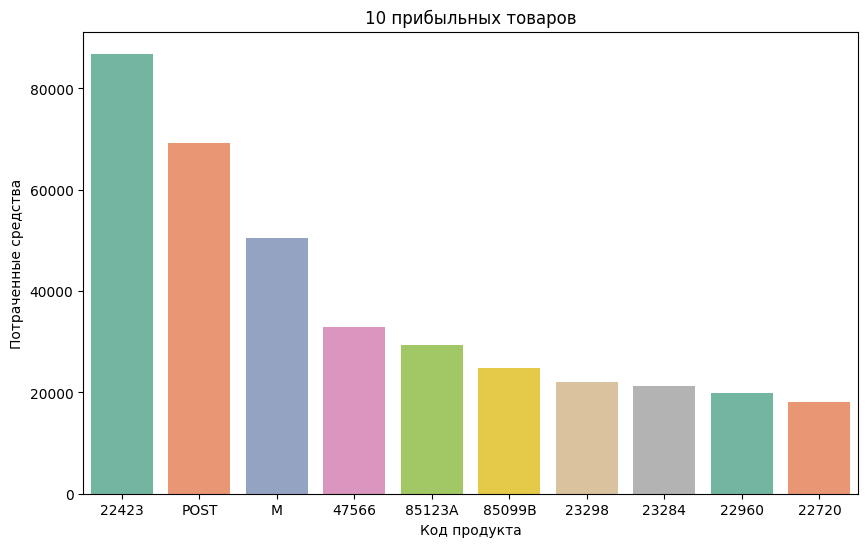

In [392]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'StockCode', y = 'Total', data = df_top_10_profitable_products, palette='Set2')
plt.title('10 прибыльных товаров')
plt.xlabel('Код продукта')
plt.ylabel('Потраченные средства')

In [393]:
#Средний чек по стране
df_avg_cheque = df.groupby('Country')['Total'].mean()[lambda x: x != 0].reset_index().sort_values(by = 'Total', ascending = False)
df_avg_cheque

,Country,Total
29,Singapore,124.604892
21,Lithuania,42.795833
20,Lebanon,38.197273
8,Czech Republic,35.757143
23,Netherlands,33.124833
15,Greece,31.610769
4,Brazil,29.110000
9,Denmark,28.878855
34,United Arab Emirates,28.177407
24,Norway,27.992235


In [394]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [395]:
df_group_date = df.groupby('InvoiceDate')['Quantity'].sum()[lambda x: x > 0].reset_index()
df_group_date

,InvoiceDate,Quantity
0,2010-12-01 08:26:00,40
1,2010-12-01 08:28:00,12
2,2010-12-01 08:34:00,66
3,2010-12-01 08:35:00,3
4,2010-12-01 08:45:00,77
...,...,...
15920,2011-12-09 12:20:00,55
15921,2011-12-09 12:21:00,18
15922,2011-12-09 12:31:00,157
15923,2011-12-09 12:49:00,18


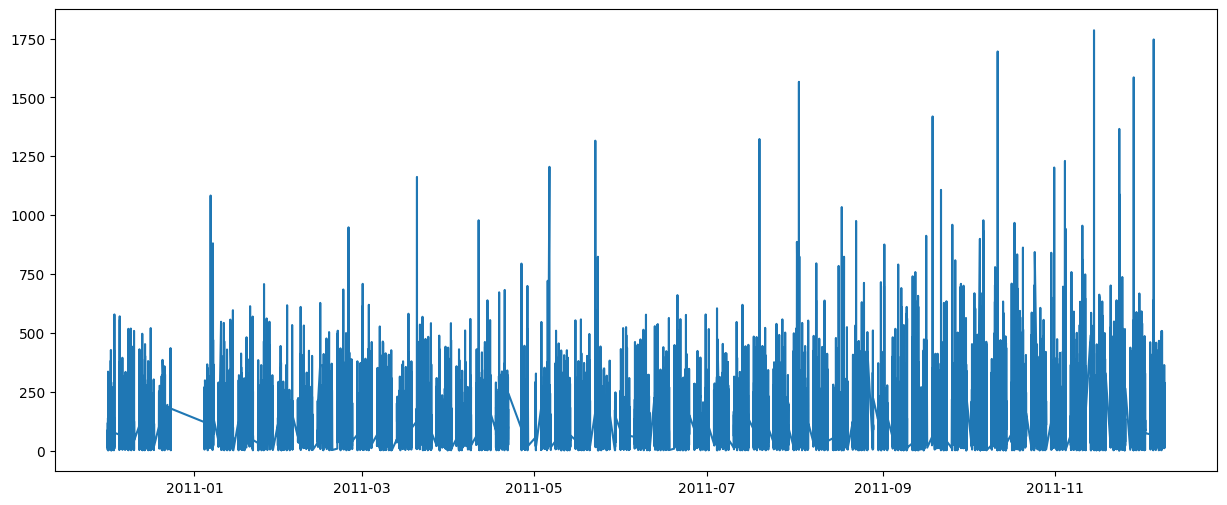

In [396]:
plt.figure(figsize = (15,6))
plt.plot(df_group_date['InvoiceDate'], df_group_date['Quantity'])